# Learn-Together: EDA

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
submission_ex = pd.read_csv("assets/learn-together/sample_submission.csv")
train_df = pd.read_csv("assets/learn-together/train.csv")
test_df = pd.read_csv("assets/learn-together/test.csv")

### Explore the Data

In [24]:
train_df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [35]:
train_df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [50]:
train_df.shape, test_df.shape

((15120, 56), (565892, 55))

### Confirm No Missing Values

The data has already been pre-processed:

In [42]:
train_df.isnull().any().sum(), test_df.isnull().any().sum()

(0, 0)

### Confirm Only Numeric Column Types

The data has already been one-hot encoded:

In [49]:
len(train_df.select_dtypes(exclude=["int64"]).columns), len(test_df.select_dtypes(exclude=["int64"]).columns)

(0, 0)

### Visualize Relationships Between Variables & Cover Type

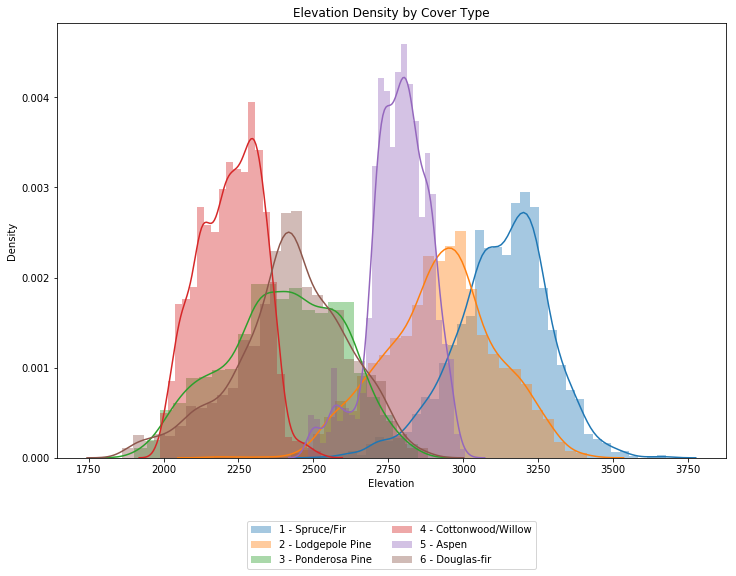

In [64]:
fig = plt.figure(figsize=(12,8))

for i in range(1, 7):
    sns.distplot(train_df["Elevation"][train_df["Cover_Type"] == i])

plt.ylabel("Density")
plt.legend(["1 - Spruce/Fir",
"2 - Lodgepole Pine",
"3 - Ponderosa Pine",
"4 - Cottonwood/Willow",
"5 - Aspen",
"6 - Douglas-fir",
"7 - Krummholz"], loc="center", bbox_to_anchor=(0.5,-0.2), ncol=2)
plt.title("Elevation Density by Cover Type")
plt.show()

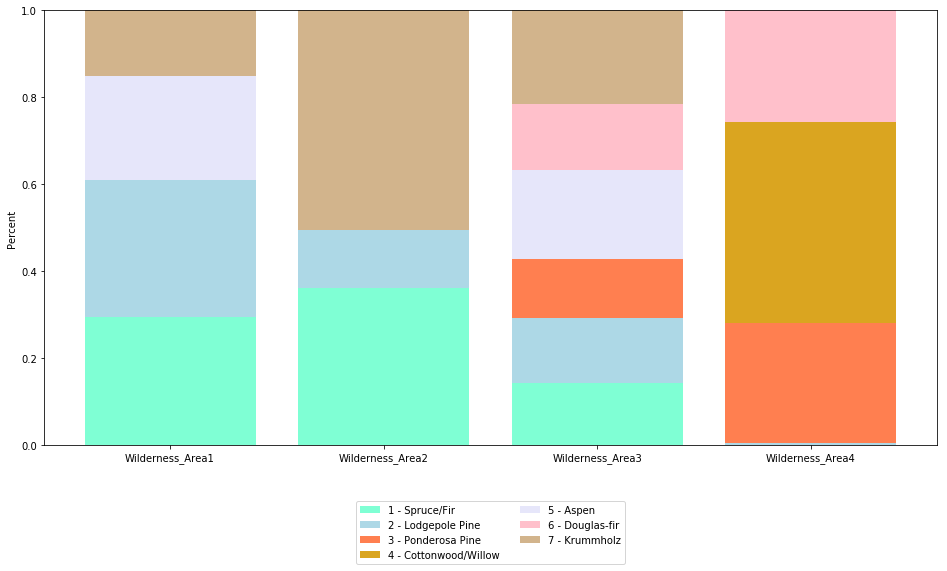

In [73]:
w = train_df[["Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4", "Cover_Type"]].groupby(["Cover_Type"]).sum()
w_percentages = w/w.sum()

labels = ["Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4"]
colors = ['aquamarine', 'lightblue', 'coral', 'goldenrod', 'lavender', 'pink', 'tan']

x = np.arange(len(w_percentages.columns.values))

plt.figure(figsize=(16,8))

for i in range(len(w_percentages.index.values)):
    if i == 0:
        running_sum = 0
    else:
        running_sum += w_percentages.iloc[i-1,:]
    plt.bar(x, w_percentages.iloc[i,:], color=colors[i], bottom=running_sum)

plt.xticks(x, labels);
plt.ylabel("Percent")
plt.legend(["1 - Spruce/Fir",
"2 - Lodgepole Pine",
"3 - Ponderosa Pine",
"4 - Cottonwood/Willow",
"5 - Aspen",
"6 - Douglas-fir",
"7 - Krummholz"], loc="center", bbox_to_anchor=(0.5,-0.2), ncol=2);

### View Correlation Heatmap

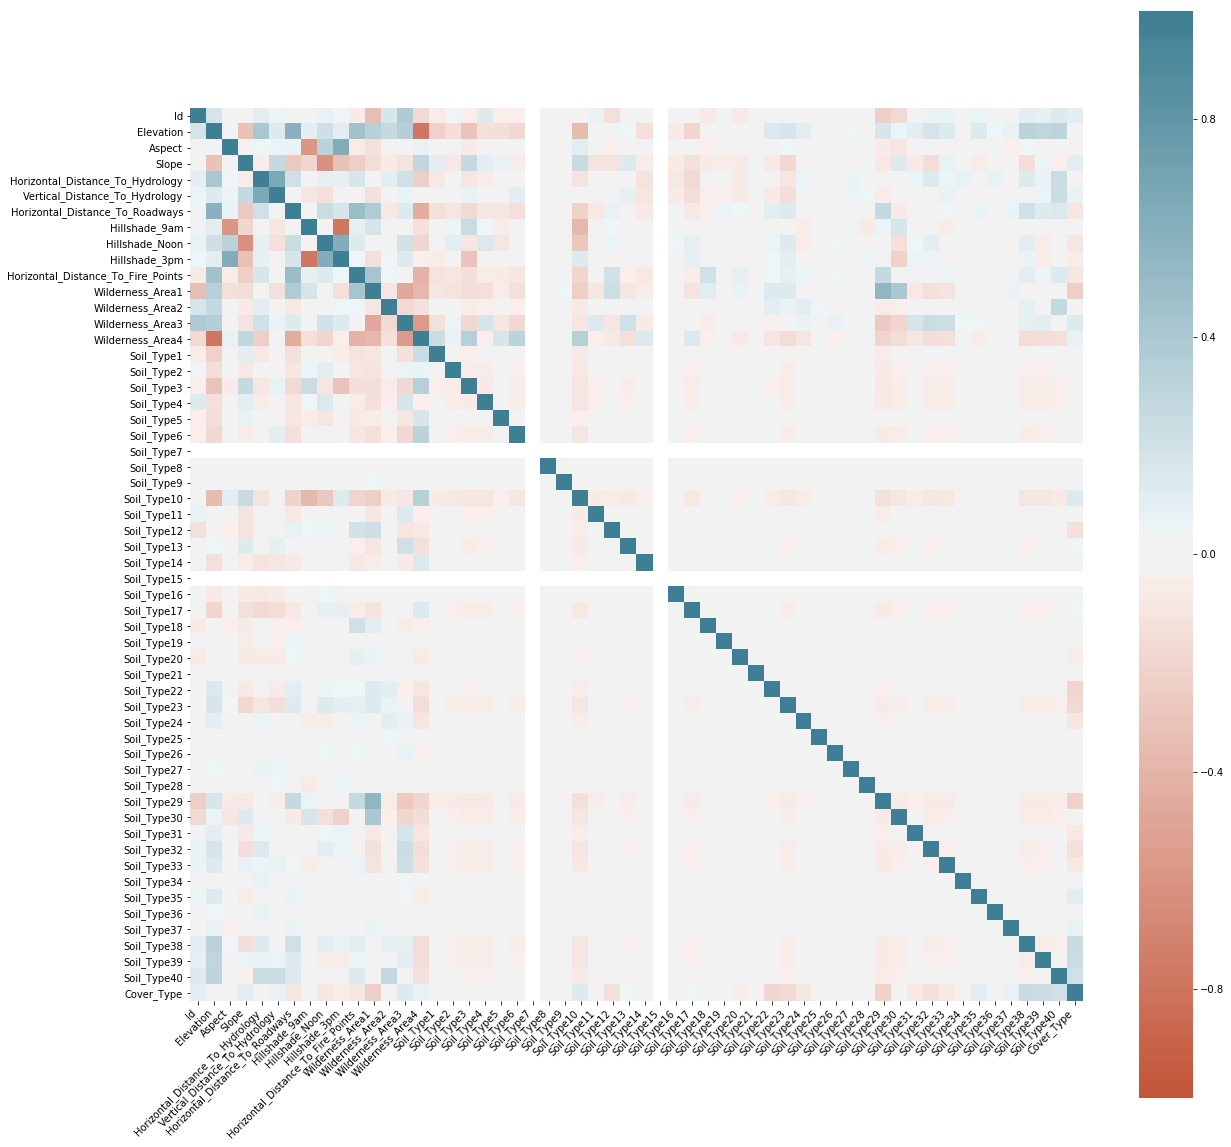

In [29]:
corr = train_df.corr()

fig = plt.figure(figsize=(20,20))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

From the correlation matrix, we can see that there are no instances of Soil_Type7 or Soil_Type15 in the training set. We should remove these columns from both our training and test sets.

In [34]:
train_df["Soil_Type7"].sum(), train_df["Soil_Type15"].sum()

(105, 0)

### View Distribution of Response (Cover Type)

We can see that there are equal numbers of each Cover Type response variable.

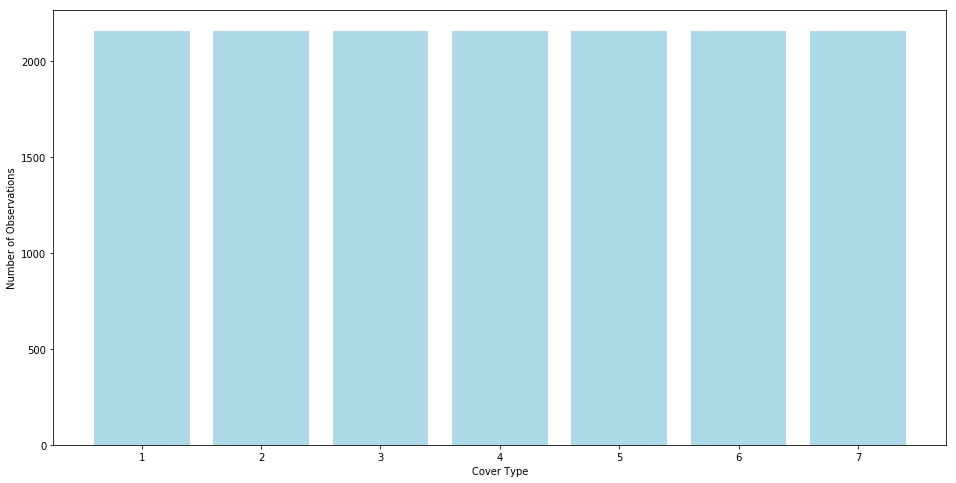

In [81]:
plt.figure(figsize=(16,8))

plt.bar(x=train_df["Cover_Type"].unique(), height=train_df["Cover_Type"].value_counts(), color="lightblue")
plt.ylabel("Number of Observations")
plt.xlabel("Cover Type")
plt.show()

## EDA Observation Summary

**Type of problem**: Multiclass Classification

**Data**: There are 54 columns of features. The training set has 15,120 rows while the test set is significantly larger with 565,892 rows. The dataset is balanced, with an equal split of response variables: 2,160 observations for each of the seven cover types. There are no missing values and all columns are numeric.

**Target**: Cover_Type

**Missing values**: Soil_Type7, Soil_Type15

**Unused Columns**: Id